In [1]:
import sys
sys.path.append("C:\\Users\\BAOVIET\\OneDrive\\Máy tính\\Tai lieu hoc tap\\2024\\FakeNews-Detection-System")

In [2]:
from sources.model.tranformers import TransformerModel
from sources.preprocessing.process import Process
from configparser import ConfigParser
import pandas as pd

In [3]:
config_path = '../sources/config/config.ini'

config = ConfigParser()
config.read(config_path)

embed_dim = config.getint("Model", "embed_dim")
num_head = config.getint("Model", "num_head")
ff_dim = config.getint("Model", "ff_dim")
vocab_size = config.getint("Model", "vocab_size")
max_len = config.getint("Model", "max_len")
weights = config.get("Model", "weights")

data_path = config.get("Data", "test")

In [4]:
data = {
    "author": "Dr. Maximilian Holland",
    "title": "EVs Take 91.0% Share In Norway — Volvo EX30 Grabs Top Spot",
    "text": "Hillary Cliton",
}
df = pd.DataFrame.from_dict(data, orient='index').T

In [5]:
model = TransformerModel(max_len, vocab_size, embed_dim, num_head, ff_dim)
model.load_weights("../"+weights)

In [7]:

preprocess = Process(vocab_size, max_len)
X, _ = preprocess.process_test_data(df)

label = model.predict(X)
print(label[0][0]) 

100%|██████████| 1/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0.3345454


In [11]:
import json


In [13]:
with open("../history.json","r") as f:
    history = json.load(f)


In [16]:
import matplotlib.pyplot as plt

# visualizing losses and accuracy
%matplotlib inline

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(train_acc))


<Figure size 640x480 with 0 Axes>

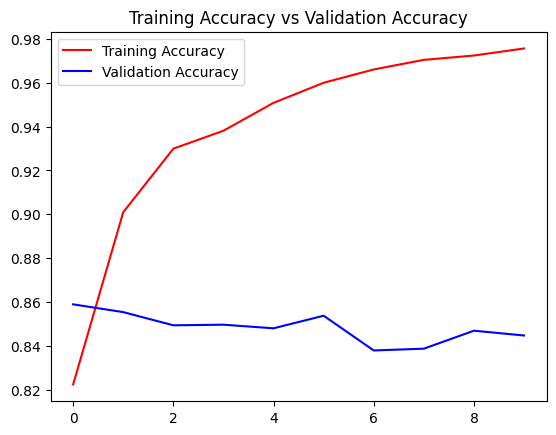

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epochs,train_acc,'r', label='Training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

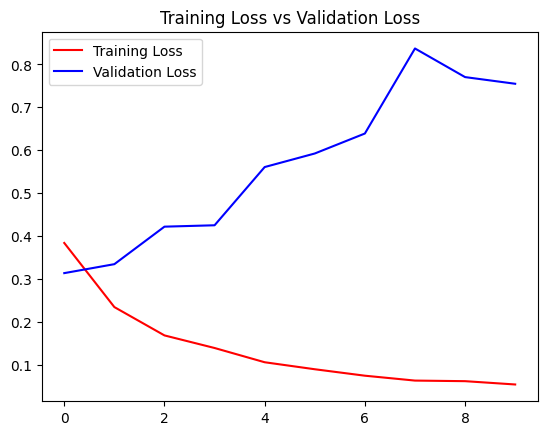

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(epochs,train_loss,'r', label='Training Loss')
plt.plot(epochs,val_loss,'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.figure()